<a href="https://colab.research.google.com/github/Ghanes22/Tugas_Python_Pertemuan10/blob/main/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls

coast@              tugas/       Tugas_Python.ipynb
highway_art252.jpg  Tugas.ipynb  Untitled0.ipynb


In [5]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
print("[INFO] loading images...")
imagePaths = paths.list_images("tugas")
data = []
labels = []

[INFO] loading images...


In [7]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)


	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway', 'highway'

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(667, 64, 64, 3)
(223, 64, 64, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [13]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
21/21 [==============================] - 0s 23ms/step - loss: 1.3516 - accuracy: 0.4378 - val_loss: 0.9359 - val_accuracy: 0.4619
Epoch 2/25
21/21 [==============================] - 0s 17ms/step - loss: 0.9273 - accuracy: 0.5517 - val_loss: 0.8964 - val_accuracy: 0.5516
Epoch 3/25
21/21 [==============================] - 0s 19ms/step - loss: 0.7773 - accuracy: 0.6642 - val_loss: 0.7192 - val_accuracy: 0.7175
Epoch 4/25
21/21 [==============================] - 0s 17ms/step - loss: 0.6896 - accuracy: 0.7241 - val_loss: 0.6075 - val_accuracy: 0.7713
Epoch 5/25
21/21 [==============================] - 0s 16ms/step - loss: 0.6568 - accuracy: 0.7406 - val_loss: 0.6783 - val_accuracy: 0.7130
Epoch 6/25
21/21 [==============================] - 0s 16ms/step - loss: 0.6755 - accuracy: 0.7241 - val_loss: 0.6354 - val_accuracy: 0.7309
Epoch 7/25
21/21 [==============================] - 0s 17ms/step - loss: 0.5889 - accuracy: 0.7706 - val_loss: 0.5767 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


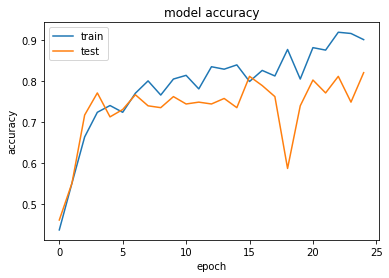

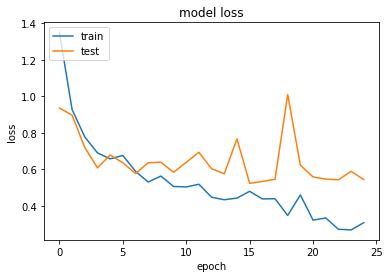

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.74      0.78      0.76        63
      forest       0.88      0.86      0.87        90
     highway       0.83      0.81      0.82        70

    accuracy                           0.82       223
   macro avg       0.81      0.82      0.82       223
weighted avg       0.82      0.82      0.82       223



In [16]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [17]:
import cv2
import matplotlib.pyplot as plt
image1='highway_art252.jpg'

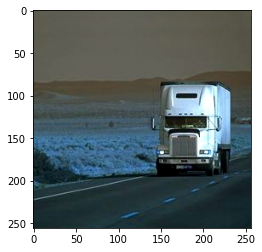

In [18]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [20]:
image_testing = Image.open('highway_art252.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)


(1, 64, 64, 3)


In [22]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.13037576 0.07119524 0.798429  ]]
['highway']
